In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
france = pd.read_csv("dataset.csv")

In [3]:
region = france[(france["reg_name"] == "Auvergne-Rhône-Alpes") 
                & (france["tax_name"] == "CVAE")]
region = region[["year", "reg_name", "tax_name", "amount"]]
region = pd.DataFrame(region.groupby("year")["amount"].sum())
region

,amount
year,
2012,455556742.00
2013,481429158.00
2014,482256773.00
2015,498635082.00
2016,506545917.00
2017,1060240622.00
2018,1066617698.00
2019,1136669837.00


In [4]:
import numpy as np
regions = pd.pivot_table(france, values="amount", index=["reg_name", "year"], 
                         columns=['tax_name'], aggfunc=np.sum, fill_value=0)
regions = pd.DataFrame(regions)
regions.head(30)

tax_name                      Achats et charges externes  Allocations APA  \
reg_name                year                                                
Auvergne-Rhône-Alpes    2012                179313013.86             0.00   
                        2013                186561801.50             0.00   
                        2014                184891710.73             0.00   
                        2015                190991336.74             0.00   
                        2016                168739945.60             0.00   
                        2017                143120929.50             0.00   
                        2018                171087463.90             0.00   
                        2019                171398099.00             0.00   
Bourgogne-Franche-Comté 2012                 69271232.24             0.00   
                        2013                 63477280.54             0.00   
                        2014                 62968374.51             0.00   
                        2015                 60235029.69             0.00   
                        2016                 54495443.47             0.00   
                        2017                109110295.00             0.00   
                        2018                212408563.10             0.00   
                        2019                245459677.80             0.00   
Bretagne                2012                 81004659.83             0.00   
                        2013                 92122157.42             0.00   
                        2014                 91828296.50             0.00   
                        2015                 85876525.01             0.00   
                        2016                 85264337.93             0.00   
                        2017                118398153.90             0.00   
                        2018                151806340.50             0.00   
                        2019                154915921.50             0.00   
Centre-Val de Loire     2012                 78179753.89             0.00   
                        2013                 76627861.55             0.00   
                        2014                 82989376.76             0.00   
                        2015                 80769321.21             0.00   
                        2016                 88212415.87             0.00   
                        2017                129562496.50             0.00   

tax_name                      Allocations PCH  Allocations RSA  \
reg_name                year                                     
Auvergne-Rhône-Alpes    2012             0.00             0.00   
                        2013             0.00             0.00   
                        2014             0.00             0.00   
                        2015             0.00             0.00   
                        2016             0.00             0.00   
                        2017             0.00             0.00   
                        2018             0.00             0.00   
                        2019             0.00             0.00   
Bourgogne-Franche-Comté 2012             0.00             0.00   
                        2013             0.00             0.00   
                        2014             0.00             0.00   
                        2015             0.00             0.00   
                        2016             0.00             0.00   
                        2017             0.00             0.00   
                        2018             0.00             0.00   
                        2019             0.00             0.00   
Bretagne                2012             0.00             0.00   
                        2013             0.00             0.00   
                        2014             0.00             0.00   
                        2015             0.00             0.00   
                        2016             0.00             0.00   
                 

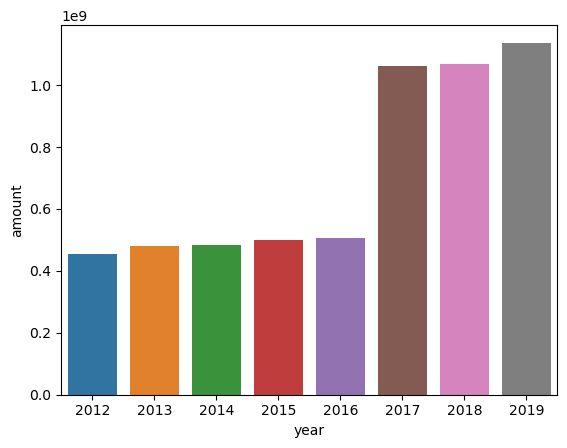

In [5]:
sns.barplot(x="year", y="amount", data=region.reset_index())
plt.show()

/home/bap/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


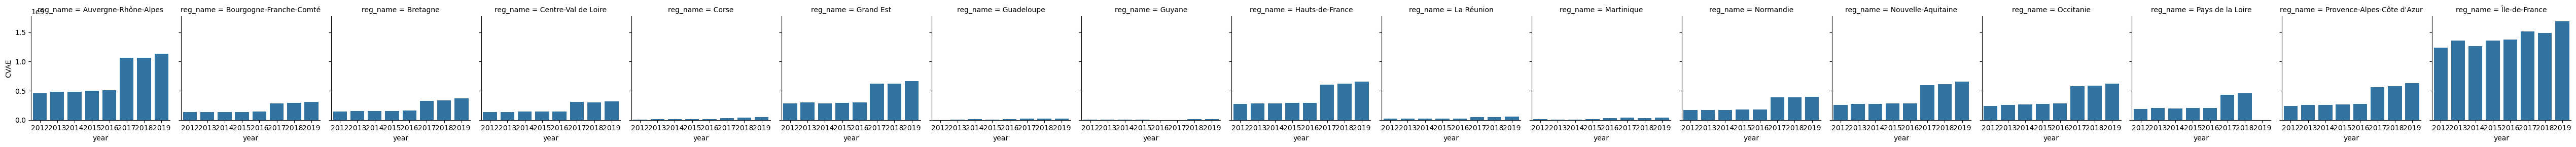

In [48]:
w = pd.DataFrame(regions.to_records())
g = sns.FacetGrid(w, col="reg_name")
g.map(sns.barplot, "year", "CVAE")
plt.show()

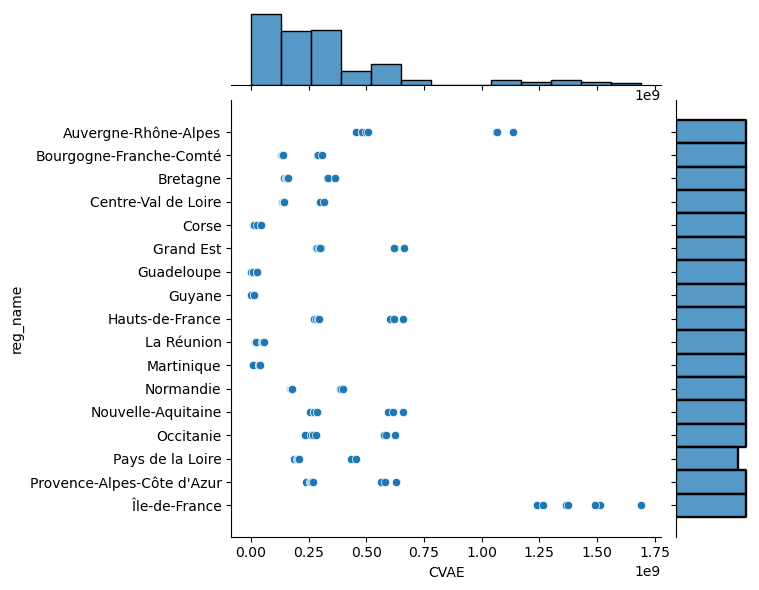

In [6]:
sns.jointplot(x="CVAE", y="reg_name", data=regions)
plt.show()